In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Set the training and testing directories
train_dir = r'C:\Users\rumai\OneDrive\Documents\MySoilModel\train'
test_dir = r'C:\Users\rumai\OneDrive\Documents\MySoilModel\test'

In [3]:
# Define the hyperparameters
batch_size = 32
epochs = 50
input_shape = (256, 256, 3)

In [4]:
# Create an image data generator with data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2
)

In [5]:
# Create an image data generator without data augmentation for the testing set
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Load the training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

Found 576 images belonging to 2 classes.


In [7]:
# Load the validation data
val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 144 images belonging to 2 classes.


In [8]:
# Load the testing data
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)

Found 80 images belonging to 2 classes.


In [9]:
# Build the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [11]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [12]:
# Train the model
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=val_data
)

Epoch 1/50
18/18 [==============================] - 24s 1s/step - loss: 0.9881 - accuracy: 0.7743 - val_loss: 0.5159 - val_accuracy: 0.6667
Epoch 2/50
18/18 [==============================] - 24s 1s/step - loss: 0.2867 - accuracy: 0.8750 - val_loss: 0.3798 - val_accuracy: 0.8403
Epoch 3/50
18/18 [==============================] - 24s 1s/step - loss: 0.3143 - accuracy: 0.8733 - val_loss: 0.3364 - val_accuracy: 0.9097
Epoch 4/50
18/18 [==============================] - 23s 1s/step - loss: 0.3126 - accuracy: 0.8646 - val_loss: 0.2904 - val_accuracy: 0.8819
Epoch 5/50
18/18 [==============================] - 23s 1s/step - loss: 0.2375 - accuracy: 0.9080 - val_loss: 0.2114 - val_accuracy: 0.9375
Epoch 6/50
18/18 [==============================] - 22s 1s/step - loss: 0.2157 - accuracy: 0.9253 - val_loss: 0.1737 - val_accuracy: 0.9375
Epoch 7/50
18/18 [==============================] - 21s 1s/step - loss: 0.2157 - accuracy: 0.9028 - val_loss: 0.4468 - val_accuracy: 0.8194
Epoch 8/50
18/18 [==

In [13]:
import matplotlib.pyplot as plt

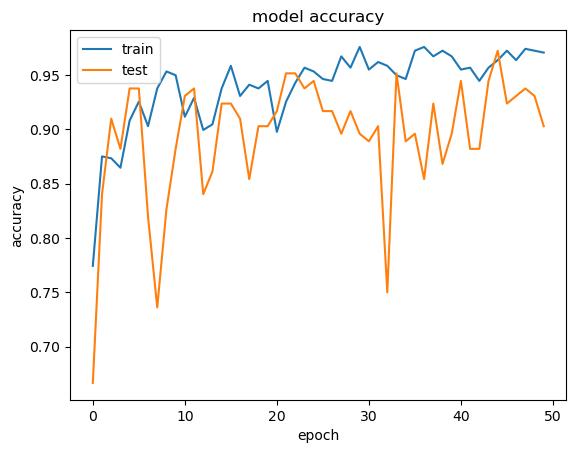

In [14]:
# Plotting the model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

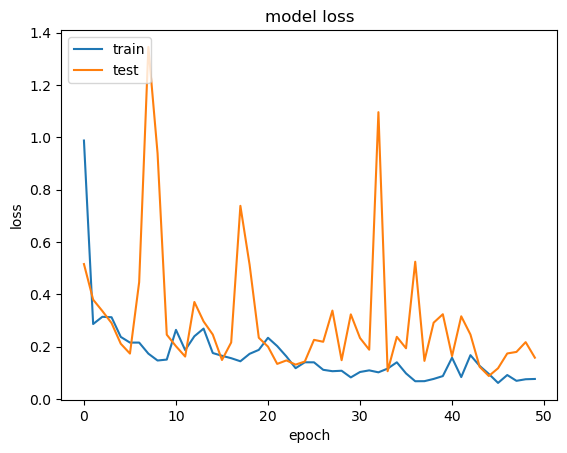

In [15]:
# Plotting the model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(test_data)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

3/3 [==============================] - 1s 186ms/step - loss: 0.1851 - accuracy: 0.9500
Test loss: 0.18513613939285278
Test accuracy: 0.949999988079071


In [17]:
# Save the trained model
model.save('soil_model.h5')

In [3]:
# Load the saved model
loaded_model = tf.keras.models.load_model('soil_model.h5')

In [4]:
# Make a prediction with the loaded model
import numpy as np
from tensorflow.keras.preprocessing import image

In [7]:
# Load an image to predict
img_path = r'C:\Users\rumai\OneDrive\Desktop\Prediction_imgs\ns5.jpeg'
img = image.load_img(img_path, target_size=(256, 256))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

In [8]:
# Predict the class of the image
prediction = loaded_model.predict(img)
if prediction > 0.5:
    print('The image is soil')
else:
    print('The image is not soil')

1/1 [==============================] - 0s 27ms/step
The image is not soil
